In [2]:
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
g=nx.karate_club_graph()#加载数据集
nodeNums=len(g.nodes())#34个节点
edgsNum=g.number_of_edges()#78条边
edgsNum#78条边


78

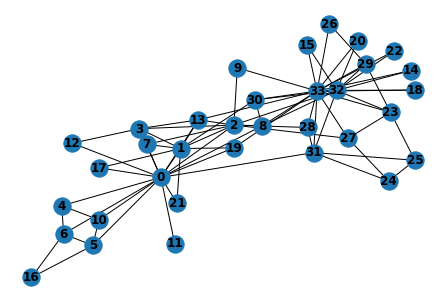

In [4]:
 nx.draw(g, with_labels=True, font_weight='bold')

In [13]:
#求邻接矩阵
m=nx.to_numpy_matrix(g)#邻接矩阵  34*34
W=m
W

matrix([[0., 1., 1., ..., 1., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 1., 0.],
        ...,
        [1., 0., 0., ..., 0., 1., 1.],
        [0., 0., 1., ..., 1., 0., 1.],
        [0., 0., 0., ..., 1., 1., 0.]])

In [14]:
#求对角矩阵
d=[np.sum(row) for row in m]#计算每一个节点的度
D=np.diag(d)#将d转化成对角矩阵
#注意np.diag的用法：
#当d为一维数组时，np.diag(d)将d转化为以d中元素为对角线元素的对角矩阵
#当d为二维数组时，输出为一维的对角线元素
D

array([[16.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  9.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., 10., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  6.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0., 12.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0., 17.]])

In [15]:
#求拉普拉斯矩阵
L=D-W

In [19]:
#Dn=D^(-1/2)   #独具真的归一化，使得数据的波动范围较小
Dn=np.power(np.linalg.matrix_power(D,-1),0.5)
# Dn=np.power(D,-0.5)#有误
Dn

array([[0.25      , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.33333333, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.31622777, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.40824829, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.28867513,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.24253563]])

In [20]:
#拉普拉斯的标准化（归一化）   防止因为数据波动较大带来的误差
# normailze
# D^(-1/2) L D^(-1/2)
Lbar=np.dot(np.dot(Dn,L),Dn)
Lbar

matrix([[ 1.        , -0.08333333, -0.07905694, ..., -0.10206207,
          0.        ,  0.        ],
        [-0.08333333,  1.        , -0.10540926, ...,  0.        ,
          0.        ,  0.        ],
        [-0.07905694, -0.10540926,  1.        , ...,  0.        ,
         -0.09128709,  0.        ],
        ...,
        [-0.10206207,  0.        ,  0.        , ...,  1.        ,
         -0.11785113, -0.09901475],
        [ 0.        ,  0.        , -0.09128709, ..., -0.11785113,
          1.        , -0.070014  ],
        [ 0.        ,  0.        ,  0.        , ..., -0.09901475,
         -0.070014  ,  1.        ]])

In [39]:
#通过拉普拉斯矩阵和K计算   最小的K个特征值和对应的特征向量
eigval,eigvec=linalg.eig(Lbar)#产生34个特征值和34个特征向量
#总的维度
dim=len(eigvec)
eigvec

array([[-3.20256308e-01, -2.96399797e-01,  1.44586983e-01, ...,
         1.65273120e-16, -1.45950702e-17,  1.11271086e-16],
       [-2.40192231e-01, -1.13413889e-01,  3.50466912e-01, ...,
        -3.52835541e-17, -7.78990047e-17, -3.82890366e-16],
       [-2.53184842e-01,  8.97112612e-03,  2.11481660e-01, ...,
         6.77070898e-16, -1.42132265e-16, -4.91892830e-16],
       ...,
       [-1.96116135e-01,  1.28108134e-01, -1.10871456e-01, ...,
        -2.11391524e-18, -1.41237881e-16,  4.21016901e-16],
       [-2.77350098e-01,  2.51627460e-01, -1.12649647e-01, ...,
         3.63046268e-16,  7.06307635e-17, -5.21225280e-16],
       [-3.30112646e-01,  2.69793542e-01, -9.23627895e-02, ...,
        -3.95635766e-16, -2.72435711e-16,  3.53729104e-16]])

In [44]:
#查找前k个小的特征值和特征向量
dictEigval=dict(zip(eigval,range(0,dim)))#返回特征值和索引，字典形式   0-33索引  {“特征值”:"索引"}
kEig=np.sort(eigval)[0:2]#前两个最小的特征值

ix=[dictEigval[k] for k in kEig]#特征值对应的索引


eigval=eigval[ix]#前k小个特征值
eigvec=eigvec[:,ix]#前k个最小的特征值对应的特征向量

# ix#前k个最小特征值对应的索引值
eigvec

array([[-0.32025631, -0.2963998 ],
       [-0.24019223, -0.11341389],
       [-0.25318484,  0.00897113],
       [-0.19611614, -0.11512758],
       [-0.13867505, -0.2671717 ],
       [-0.16012815, -0.34638736],
       [-0.16012815, -0.34638736],
       [-0.16012815, -0.08992931],
       [-0.17902872,  0.05282964],
       [-0.1132277 ,  0.05563406],
       [-0.13867505, -0.2671717 ],
       [-0.08006408, -0.0853954 ],
       [-0.1132277 , -0.09868424],
       [-0.17902872, -0.04671125],
       [-0.1132277 ,  0.11251508],
       [-0.1132277 ,  0.11251508],
       [-0.1132277 , -0.28226926],
       [-0.1132277 , -0.09119046],
       [-0.1132277 ,  0.11251508],
       [-0.13867505, -0.03091925],
       [-0.1132277 ,  0.11251508],
       [-0.1132277 , -0.09119046],
       [-0.1132277 ,  0.11251508],
       [-0.17902872,  0.19602288],
       [-0.13867505,  0.13544115],
       [-0.13867505,  0.14515535],
       [-0.1132277 ,  0.12748466],
       [-0.16012815,  0.1349113 ],
       [-0.13867505,

In [50]:
#不经过k-means聚类，而是直接通过特征向量来判断点的归属
clusterA=[i for i in range(0,nodeNums) if eigvec[i,1]>0]
len(clusterA)
clusterB=[i for i in range(0,nodeNums) if eigvec[i,1]<0]
len(clusterB)

15

In [53]:
#节点分类
colList=dict.fromkeys(g.nodes())#初始化一个索引为0-33  键值为none的字典
#对字典进行二值处理
for node,score in colList.items():
	if node in clusterA:
		colList[node]=0
	else:
		colList[node]=0.6
colList

{0: 0.6,
 1: 0.6,
 2: 0,
 3: 0.6,
 4: 0.6,
 5: 0.6,
 6: 0.6,
 7: 0.6,
 8: 0,
 9: 0,
 10: 0.6,
 11: 0.6,
 12: 0.6,
 13: 0.6,
 14: 0,
 15: 0,
 16: 0.6,
 17: 0.6,
 18: 0,
 19: 0.6,
 20: 0,
 21: 0.6,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0}

In [69]:
list(colList.values())

[0.6,
 0.6,
 0,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0,
 0,
 0.6,
 0.6,
 0.6,
 0.6,
 0,
 0,
 0.6,
 0.6,
 0,
 0.6,
 0,
 0.6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

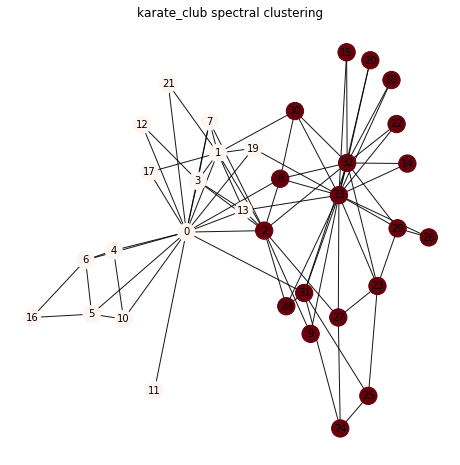

In [91]:
#作图
plt.figure(figsize=(8,8))
pos=nx.spring_layout(g)#字典形式，返回的长度为2的序列，标记节点在的坐标位置

nx.draw_networkx_edges(g,pos,alpha=0.9)
nx.draw_networkx_nodes(g,pos,nodelist=colList.keys(),
		node_color=list(colList.values()),
		cmap=plt.cm.Reds_r)
nx.draw_networkx_labels(g,pos,font_size=10,font_family='sans-serif')#标签  顶点上的数字标识·

plt.axis('off')
plt.title("karate_club spectral clustering")
plt.show()

In [101]:

#使用k-means聚类   聚类效果一般
lam, H = np.linalg.eig(Lbar)
from sklearn.cluster import KMeans
sp_kmeans = KMeans(n_clusters=2).fit(H)
lables=sp_kmeans.labels_
lables

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

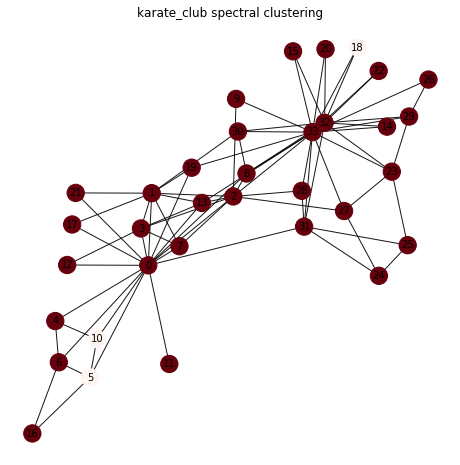

In [102]:
#作图
plt.figure(figsize=(8,8))
pos=nx.spring_layout(g)#字典形式，返回的长度为2的序列，标记节点在的坐标位置

nx.draw_networkx_edges(g,pos,alpha=0.9)
nx.draw_networkx_nodes(g,pos,nodelist=colList.keys(),
		node_color=lables,
		cmap=plt.cm.Reds_r)
nx.draw_networkx_labels(g,pos,font_size=10,font_family='sans-serif')#标签  顶点上的数字标识·

plt.axis('off')
plt.title("karate_club spectral clustering")
plt.show()